Nama : Agung Marbun Submission Akhir Pengembangan Machine Learning dengan memakai lebih dari 10 ribu data dengan 3 kelas berbeda.

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Disini saya akhirnya menggunakan GPU dan sangat sangat membantu untuk mempercepat proses eksekusi epoch, saya mencoba tanpa GPU dan dapat memakan waktu sampai 2 jam dan itupun berujung Outoftime(Runtime terputus)

In [2]:
import zipfile, os
local_zip = '/content/ShoeSandalBoot.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/ShoeSandalBoot')
zip_ref.close()
 
base_dir = '/content/ShoeSandalBoot/Shoe vs Sandal vs Boot Dataset'

Saya download data berikut melalui kaggle, berikut saya lampirkan linknya : https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images.

In [3]:
os.listdir('/content/ShoeSandalBoot/Shoe vs Sandal vs Boot Dataset')

['Sandal', 'Shoe', 'Boot']

Kita dapat lihat bahwa terdapat 3 kelas berbeda pada dataset saya.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)

Sesuai tips and trick dari mimin dicoding disini saya hanya melakukan data augmentation pada data training saja. "Pastikan hanya melakukan data augmentation pada data training saja sehingga dapat menjaga konsistensi terhadap data validation yang digunakan sebagai referensi."

In [5]:
train_datagen

In [6]:
# Membuat generator untuk data latih dan validasi
train_generator = train_datagen.flow_from_directory(
    base_dir,
    # target_size=(100, 150), agar tidak seragam
    shuffle=True,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    # target_size=(100, 150),
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


Disini kita bisa melihat bahwa kita memiliki 15000 data dengan 3 different classes. Disini saya tidak mengeksekusi kode **target_size** karena saya ingin mencoba memenuhi kriteria bintang 5 pada ketentuan di proyek akhir.

In [7]:
# Model dan kompilasi
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(None, None, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Disini saya juga menerapkan hal yang sama pada input_shape dimana saya ingin agar dataset tidak seragam.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 128)   73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 128)  0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Disini saya menggunakan categorical_crossentropy karena saya mempunyai 3 kelas yang berbeda.

In [10]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      self.model.stop_training = True
      print("\nAkurasi telah mencapai > 92%!")
callbacks = myCallbacks()

Disini saya juga mengaplikasikan callback dengan tujuan apabila akurasi telah terpenuhi maka akan stop dengan sendirinya dengan kode self.model.stop_training.

In [11]:
# Pelatihan model
with tf.device('/device:GPU:0'):
  history = model.fit(train_generator,
          steps_per_epoch=25,
          epochs=200,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2,
          callbacks=[myCallbacks()])

Epoch 1/200
25/25 - 28s - loss: 1.1067 - accuracy: 0.3575 - val_loss: 1.0815 - val_accuracy: 0.3562 - 28s/epoch - 1s/step
Epoch 2/200
25/25 - 17s - loss: 1.0585 - accuracy: 0.3900 - val_loss: 1.0570 - val_accuracy: 0.5063 - 17s/epoch - 690ms/step
Epoch 3/200
25/25 - 15s - loss: 1.0027 - accuracy: 0.5100 - val_loss: 0.9495 - val_accuracy: 0.5375 - 15s/epoch - 590ms/step
Epoch 4/200
25/25 - 21s - loss: 0.9786 - accuracy: 0.5088 - val_loss: 0.9443 - val_accuracy: 0.5375 - 21s/epoch - 847ms/step
Epoch 5/200
25/25 - 15s - loss: 0.9821 - accuracy: 0.5275 - val_loss: 0.9051 - val_accuracy: 0.5688 - 15s/epoch - 596ms/step
Epoch 6/200
25/25 - 15s - loss: 0.9718 - accuracy: 0.5163 - val_loss: 0.9384 - val_accuracy: 0.5437 - 15s/epoch - 609ms/step
Epoch 7/200
25/25 - 15s - loss: 0.8937 - accuracy: 0.5775 - val_loss: 0.8967 - val_accuracy: 0.5625 - 15s/epoch - 597ms/step
Epoch 8/200
25/25 - 15s - loss: 0.9485 - accuracy: 0.5437 - val_loss: 0.9359 - val_accuracy: 0.5312 - 15s/epoch - 602ms/step
Epo

Setelah akurasi terpenuhi maka selanjutnya saya plot menggunakan library/modul matplotlib.pyplot

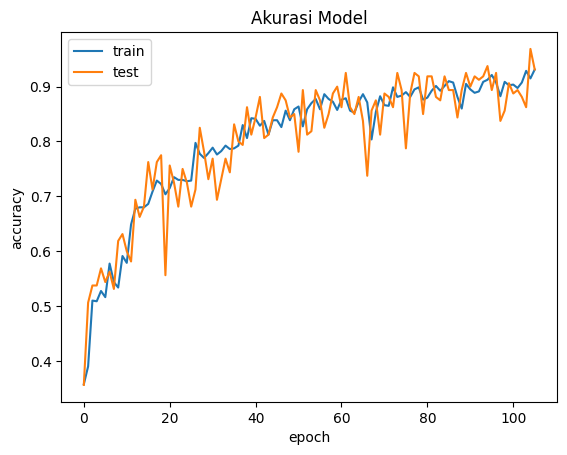

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

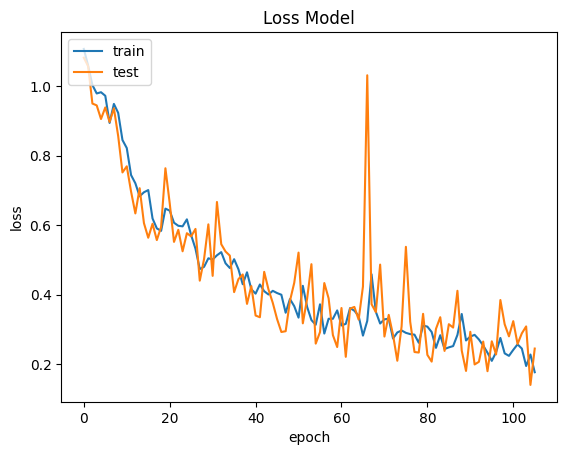

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Menulis kode untuk menyimpan model ke dalam format TF-Lite.

In [15]:
import warnings
warnings.filterwarnings('ignore')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)